In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import scipy.integrate as integ
from scipy.signal import find_peaks
from scipy.constants import e
from scipy.optimize import curve_fit

# Example code

<AxesSubplot:xlabel='Time[ns]'>

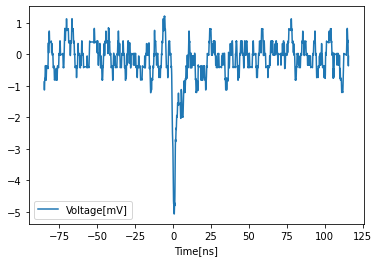

In [2]:
filename=r'C:\Users\patri\Documents\Uni\Fopra\Silizium\FOPRA_Walther_patrick_schwarzfischer\54p3_1pe\54p3_1pe_001.csv'
df=pd.read_csv(filename,dtype=float)
df.plot(x="Time[ns]",y="Voltage[mV]")

To establish a baseline from which we will measure the height of the peak we will set the integral of the measured voltage to zero

In [3]:
#calculating integral and integration interval
integral=integ.trapezoid(df["Voltage[mV]"],dx=0.1) 
l=df["Time[ns]"].max()+np.abs(df["Time[ns]"].min())

#by shifting each datapoint by the integral divided by the integration interval the total shift should amount to the integral
#itself and thus bring our total integral to 0
integral0=integ.trapezoid(df["Voltage[mV]"]-integral/l,dx=0.1)
integral0

-4.52585513954773e-07

We will now proceed to calculate the difference between the two peaks with our established baseline

In [4]:
#data with corrected baseline
df["Voltage_corrected[mV]"]=df["Voltage[mV]"]-integral/l

<AxesSubplot:xlabel='Time[ns]'>

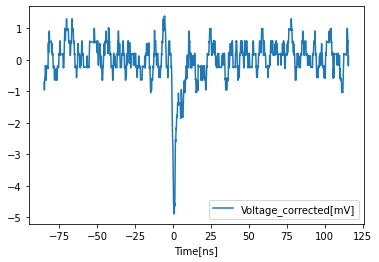

In [5]:
df.plot(x="Time[ns]",y="Voltage_corrected[mV]")

In [6]:
y=df["Voltage_corrected[mV]"]
#finding peak position of maximum of mirrored dataset, mirrored because the peak is downwards
peak_pos,prop=find_peaks(-y)
peak_heigth_1pe=np.max(np.abs(y[peak_pos]))
peak_heigth_1pe

4.896946806911238

We can see that the above code works when comparing the obtained height of the peak with the plot. We will now do the same thing for the 2pe peak. The code is the same so we will only show the final result

10.647039488311435

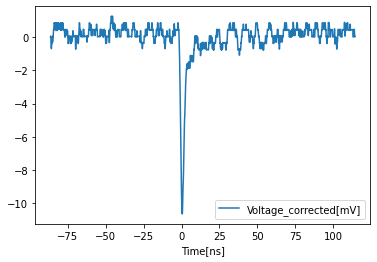

In [7]:
filename2=r'C:\Users\patri\Documents\Uni\Fopra\Silizium\FOPRA_Walther_patrick_schwarzfischer\54p3_2pe\54p3_2pe_001.csv'
df2=pd.read_csv(filename2,dtype=float)
#calculating integral and integration interval
integral2=integ.trapezoid(df2["Voltage[mV]"],dx=0.1) 
l2=df2["Time[ns]"].max()+np.abs(df2["Time[ns]"].min())
#data with corrected baseline
df2["Voltage_corrected[mV]"]=df2["Voltage[mV]"]-integral2/l2
y2=df2["Voltage_corrected[mV]"]
#finding peak position of maximum of mirrored dataset, mirrored because the peak is downwards
peak_pos2,prop2=find_peaks(-y2)
df2.plot(x="Time[ns]",y="Voltage_corrected[mV]")
peak_heigth_2pe=np.max(np.abs(y2[peak_pos2]))
peak_heigth_2pe

We can once again compare the numerical result with the plot to see if our code works

This only served for illustrative purposes, the real data analysis will be done below by looping trough all the folders

# Used code

In [8]:
def peaks(filename):
    df=pd.read_csv(filename,dtype=float)
    #calculating integral and integration interval
    integral=integ.trapezoid(df["Voltage[mV]"],dx=0.1) 
    l=df["Time[ns]"].max()+np.abs(df["Time[ns]"].min())

    #by shifting each datapoint by the integral divided by the integration interval the total shift should amount to the integral
    #itself and thus bring our total integral to 0
    integral0=integ.trapezoid(df["Voltage[mV]"]-integral/l,dx=0.1)
    
    #some debugging to check wether teh integral is actually always 0
    if np.abs(integral0)>0.001:
        print(filename)
    #data with corrected baseline
    df["Voltage_corrected[mV]"]=df["Voltage[mV]"]-integral/l
    y=df["Voltage_corrected[mV]"]
    #finding peak position of maximum of mirrored dataset, mirrored because the peak is downwards
    peak_pos,prop=find_peaks(-y)
    peak_heigth=np.max(np.abs(y[peak_pos]))
    return peak_heigth

def gain(Vbias,C,Vbd):
    return C*(Vbias-Vbd)/e

In [9]:
folders=[]
filenames=[]
peak_heigth_1pe=[]
peak_heigth_2pe=[]
for foldername in os.listdir(r'C:\Users\patri\Documents\Uni\Fopra\Silizium\FOPRA_Walther_patrick_schwarzfischer'):
    folders.append(foldername)
folders1pe=folders[::2]
folders2pe=folders[1::2]
for foldername in folders1pe:
    path_temp=os.path.join(r'C:\Users\patri\Documents\Uni\Fopra\Silizium\FOPRA_Walther_patrick_schwarzfischer',foldername)
    for filename in os.listdir(path_temp):
        path=os.path.join(path_temp,filename)
        peak_heigth_1pe.append(peaks(path))
for foldername2 in folders2pe:
    path_temp2=os.path.join(r'C:\Users\patri\Documents\Uni\Fopra\Silizium\FOPRA_Walther_patrick_schwarzfischer',foldername2)
    for filename2 in os.listdir(path_temp2):
        path2=os.path.join(path_temp2,filename2)
        peak_heigth_2pe.append(peaks(path2))

In [10]:
pe=np.array([peak_heigth_2pe[i]-peak_heigth_1pe[i] for i in range(len(peak_heigth_1pe))])
Vbias=np.array([54.3]*500+[55.3]*500+[56.3]*500+[57.3]*500)

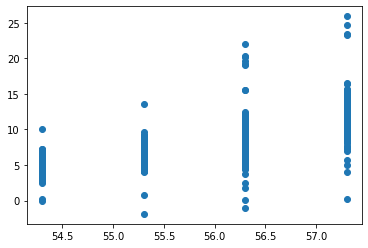

In [11]:
plt.scatter(Vbias,pe)

In [12]:
def lin_func(x,C,V_bd):
    return C*(x-V_bd)/e

In [20]:
popt, pcov = curve_fit(lin_func,Vbias,pe)
x=np.linspace(54,58,200)
y=lin_func(x,popt[0],popt[1])

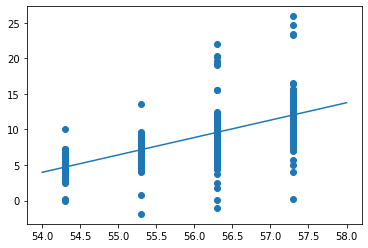

In [21]:
plt.plot(x,y)
plt.scatter(Vbias,pe)

In [24]:
#fitting parameters
popt

array([3.92461279e-19, 5.23798521e+01])

In [25]:
pcov

array([[2.70656175e-41, 2.35866367e-22],
       [2.35866367e-22, 2.27513556e-03]])